# Unsupervised topic classification

https://github.com/captain500/elmundodelosdatos/blob/main/3_topic_modeling_gensim/asignacion_topicos.ipynb

In [2]:
import json, re
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import ToktokTokenizer

In [15]:
from share import years
set_yearly_words = []
all_df = pd.read_csv(f'/Users/almacuevas/work_projects/conferencias_matutinas_amlo/all_df_preprocess.csv')
for year_label in years:
    all_df_year = all_df[all_df['Anio'] == int(year_label)]['preprocess']
    set_yearly_words.append(' '.join(all_df_year))
set_yearly_words_df = pd.DataFrame({'text': set_yearly_words, 'year':years})
set_yearly_words_df

,text,year
0,Informarles que el día de hoy voy a enviar al...,2018
1,Buenos días Ánimo Bueno el día de hoy vamos ...,2019
2,Buenos días Bueno estamos iniciando la seman...,2020
3,Buenos días Bueno vamos a informar Primero q...,2021
4,Buenos días Bueno pues hoy jueves 20 de ener...,2022
5,Buenos días Ánimo Bueno pues vamos a informa...,2023


In [16]:
def limpiar_texto(texto):
    """
    Función para realizar una limpieza de un texto dado.
    """
    # Eliminamos los caracteres especiales
    texto = re.sub(r'\W', ' ', str(texto))
    # Eliminado las palabras que tengo un solo caracter
    texto = re.sub(r'\s+[a-zA-Z]\s+', ' ', texto)
    # Sustituir los espacios en blanco en uno solo
    texto = re.sub(r'\s+', ' ', texto, flags=re.I)
    # Convertimos textos a minusculas
    texto = texto.lower()
    return texto

In [17]:
set_yearly_words_df["Tokens"] = set_yearly_words_df.text.apply(limpiar_texto)
print(set_yearly_words_df.Tokens[0])
set_yearly_words_df.head()

 informarles que el día de hoy voy enviar al senado de la república la terna de posible ministro para la suprema corte de justicia está vacante el lugar del ministro cossío por ley de conformidad con la constitución con el artículo 95 96 es una facultad del titular del ejecutivo presentar una terna al senado les doy conocer los nombres de quienes están propuestos la abogada loretta ortiz ella es egresada de la escuela libre de derecho tiene maestría tiene doctorado es académica de la universidad iberoamericana cumple con los requisitos también la licenciada celia maya garcía ella es magistrada del tribunal superior de justicia en el estado de querétaro es egresada de la universidad autónoma de querétaro tiene maestría en derecho procesal penal inició en el poder judicial del estado de querétaro como juez desde 1979 el tercer abogado propuesto es el licenciado también doctor en derecho por la unam juan luis gonzález alcántara carrancá él entre otras funciones ya fue presidente del tribu

,text,year,Tokens
0,Informarles que el día de hoy voy a enviar al...,2018,informarles que el día de hoy voy enviar al s...
1,Buenos días Ánimo Bueno el día de hoy vamos ...,2019,buenos días ánimo bueno el día de hoy vamos d...
2,Buenos días Bueno estamos iniciando la seman...,2020,buenos días bueno estamos iniciando la semana...
3,Buenos días Bueno vamos a informar Primero q...,2021,buenos días bueno vamos informar primero quie...
4,Buenos días Bueno pues hoy jueves 20 de ener...,2022,buenos días bueno pues hoy jueves 20 de enero...


In [18]:
tokenizer = ToktokTokenizer()
set_yearly_words_df["Tokens"] = set_yearly_words_df.Tokens.apply(tokenizer.tokenize)
print(set_yearly_words_df.Tokens[0])
set_yearly_words_df.head()

['informarles', 'que', 'el', 'día', 'de', 'hoy', 'voy', 'enviar', 'al', 'senado', 'de', 'la', 'república', 'la', 'terna', 'de', 'posible', 'ministro', 'para', 'la', 'suprema', 'corte', 'de', 'justicia', 'está', 'vacante', 'el', 'lugar', 'del', 'ministro', 'cossío', 'por', 'ley', 'de', 'conformidad', 'con', 'la', 'constitución', 'con', 'el', 'artículo', '95', '96', 'es', 'una', 'facultad', 'del', 'titular', 'del', 'ejecutivo', 'presentar', 'una', 'terna', 'al', 'senado', 'les', 'doy', 'conocer', 'los', 'nombres', 'de', 'quienes', 'están', 'propuestos', 'la', 'abogada', 'loretta', 'ortiz', 'ella', 'es', 'egresada', 'de', 'la', 'escuela', 'libre', 'de', 'derecho', 'tiene', 'maestría', 'tiene', 'doctorado', 'es', 'académica', 'de', 'la', 'universidad', 'iberoamericana', 'cumple', 'con', 'los', 'requisitos', 'también', 'la', 'licenciada', 'celia', 'maya', 'garcía', 'ella', 'es', 'magistrada', 'del', 'tribunal', 'superior', 'de', 'justicia', 'en', 'el', 'estado', 'de', 'querétaro', 'es', 'eg

,text,year,Tokens
0,Informarles que el día de hoy voy a enviar al...,2018,"[informarles, que, el, día, de, hoy, voy, envi..."
1,Buenos días Ánimo Bueno el día de hoy vamos ...,2019,"[buenos, días, ánimo, bueno, el, día, de, hoy,..."
2,Buenos días Bueno estamos iniciando la seman...,2020,"[buenos, días, bueno, estamos, iniciando, la, ..."
3,Buenos días Bueno vamos a informar Primero q...,2021,"[buenos, días, bueno, vamos, informar, primero..."
4,Buenos días Bueno pues hoy jueves 20 de ener...,2022,"[buenos, días, bueno, pues, hoy, jueves, 20, d..."


In [19]:
STOPWORDS = set(stopwords.words("spanish"))

def filtrar_stopword_digitos(tokens):
    """
    Filtra stopwords y digitos de una lista de tokens.
    """
    return [token for token in tokens if token not in STOPWORDS and not token.isdigit()]

set_yearly_words_df["Tokens"] = set_yearly_words_df.Tokens.apply(filtrar_stopword_digitos)

set_yearly_words_df.head()

,text,year,Tokens
0,Informarles que el día de hoy voy a enviar al...,2018,"[informarles, día, hoy, voy, enviar, senado, r..."
1,Buenos días Ánimo Bueno el día de hoy vamos ...,2019,"[buenos, días, ánimo, bueno, día, hoy, vamos, ..."
2,Buenos días Bueno estamos iniciando la seman...,2020,"[buenos, días, bueno, iniciando, semana, van, ..."
3,Buenos días Bueno vamos a informar Primero q...,2021,"[buenos, días, bueno, vamos, informar, primero..."
4,Buenos días Bueno pues hoy jueves 20 de ener...,2022,"[buenos, días, bueno, pues, hoy, jueves, enero..."


In [20]:
stemmer = SnowballStemmer("spanish")

def stem_palabras(tokens):
    """
    Reduce cada palabra de una lista dada a su raíz.
    """
    return [stemmer.stem(token) for token in tokens]

set_yearly_words_df["Tokens"] = set_yearly_words_df.Tokens.apply(stem_palabras)

set_yearly_words_df.head()

,text,year,Tokens
0,Informarles que el día de hoy voy a enviar al...,2018,"[inform, dia, hoy, voy, envi, sen, republ, ter..."
1,Buenos días Ánimo Bueno el día de hoy vamos ...,2019,"[buen, dias, anim, buen, dia, hoy, vam, dar, b..."
2,Buenos días Bueno estamos iniciando la seman...,2020,"[buen, dias, buen, inici, seman, van, acompañ,..."
3,Buenos días Bueno vamos a informar Primero q...,2021,"[buen, dias, buen, vam, inform, primer, quier,..."
4,Buenos días Bueno pues hoy jueves 20 de ener...,2022,"[buen, dias, buen, pues, hoy, juev, ener, mes,..."


## Part II: Topics

In [21]:
df = set_yearly_words_df

In [22]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import random
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [23]:
diccionario = Dictionary(df.Tokens)
print(f'Número de tokens: {len(diccionario)}')

Número de tokens: 30036


In [24]:
diccionario.filter_extremes(no_below=2, no_above = 0.8)
print(f'Número de tokens: {len(diccionario)}')

Número de tokens: 9487


In [25]:
# Creamos el corpus
corpus = [diccionario.doc2bow(noticia) for noticia in df.Tokens]

# Mostramos el BOW de una noticia representado
# como una lista de tuplas (ID, frecuencia)
print(corpus[0])

[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 2), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 2), (32, 2), (33, 1), (34, 1), (35, 2), (36, 2), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 2), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 2), (50, 2), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1)]


# LDA model construction

In [26]:
lda = LdaModel(corpus=corpus, id2word=diccionario,
               num_topics=50, random_state=42,
               chunksize=1000, passes=10, alpha='auto')

In [27]:
topicos = lda.print_topics(num_words=5, num_topics=50)
for topico in topicos:
    print(topico)

(0, '0.001*"cov" + 0.000*"viaduct" + 0.000*"icel" + 0.000*"pfiz" + 0.000*"coronavirus"')
(1, '0.004*"cov" + 0.001*"pfiz" + 0.001*"icel" + 0.001*"astrazenec" + 0.001*"coronavirus"')
(2, '0.089*"cov" + 0.037*"pfiz" + 0.024*"astrazenec" + 0.020*"cansin" + 0.013*"birmex"')
(3, '0.001*"cov" + 0.000*"icel" + 0.000*"pfiz" + 0.000*"viaduct" + 0.000*"cansin"')
(4, '0.005*"cov" + 0.002*"coronavirus" + 0.001*"pfiz" + 0.001*"epidem" + 0.001*"viaduct"')
(5, '0.003*"cov" + 0.001*"coronavirus" + 0.001*"epidem" + 0.001*"icel" + 0.001*"pfiz"')
(6, '0.001*"cov" + 0.001*"icel" + 0.000*"pfiz" + 0.000*"viaduct" + 0.000*"coronavirus"')
(7, '0.006*"cov" + 0.001*"coronavirus" + 0.001*"pfiz" + 0.001*"astrazenec" + 0.001*"icel"')
(8, '0.001*"cov" + 0.001*"icel" + 0.000*"pfiz" + 0.000*"viaduct" + 0.000*"ucrani"')
(9, '0.002*"cov" + 0.001*"icel" + 0.001*"ucrani" + 0.000*"viaduct" + 0.000*"pfiz"')
(10, '0.002*"cov" + 0.000*"icel" + 0.000*"pfiz" + 0.000*"coronavirus" + 0.000*"viaduct"')
(11, '0.003*"cov" + 0.001*"p

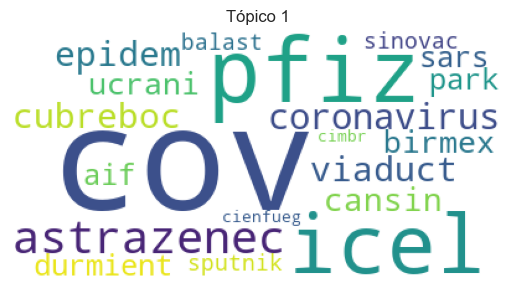

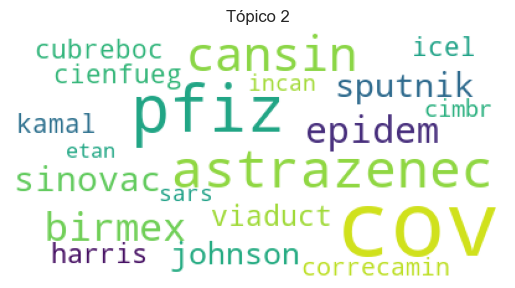

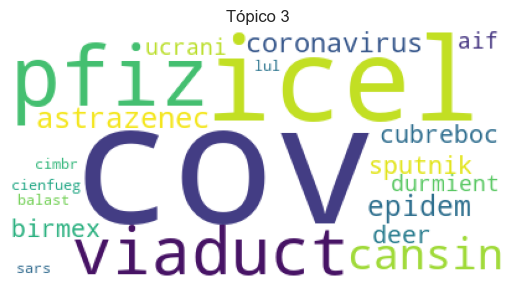

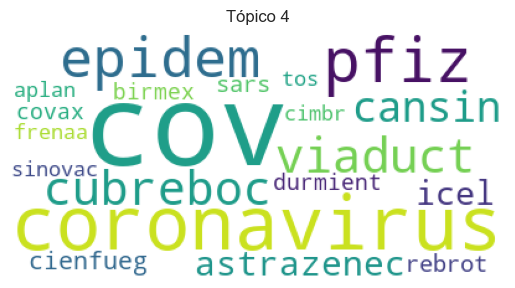

In [28]:
for i in range(1, 5):
    plt.figure()
    plt.imshow(WordCloud(background_color='white', prefer_horizontal=1.0)
               .fit_words(dict(lda.show_topic(i, 20))))
    plt.axis("off")
    plt.title("Tópico " + str(i))
    plt.show()

# Define the topics per year

In [61]:
indice_noticia = 5
noticia = df.iloc[indice_noticia]
print("Titular: " + noticia.year)
print(noticia.text)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [62]:
indice_noticia

5

In [63]:
bow_noticia = corpus[indice_noticia]
distribucion_noticia = lda[bow_noticia]
bow_noticia[0:10]

[(5, 2),
 (7, 1),
 (13, 1),
 (14, 4),
 (16, 1),
 (18, 1),
 (21, 1),
 (28, 4),
 (32, 8),
 (36, 1)]

In [64]:
# Indices de los topicos mas significativos
dist_indices = [topico[0] for topico in lda[bow_noticia]]
# Contribucion de los topicos mas significativos
dist_contrib = [topico[1] for topico in lda[bow_noticia]]

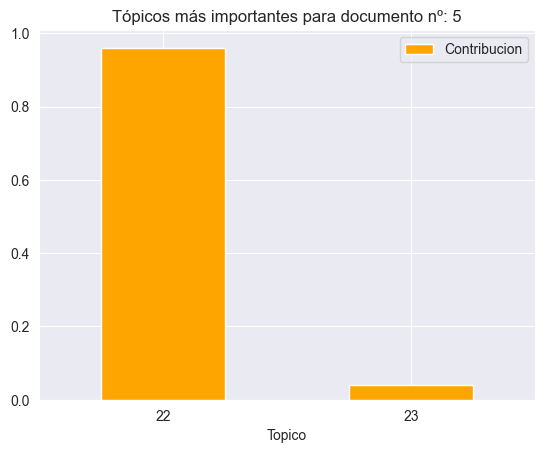

In [65]:
distribucion_topicos = pd.DataFrame({'Topico':dist_indices,'Contribucion':dist_contrib })
distribucion_topicos.sort_values('Contribucion', ascending=False, inplace=True)
ax = distribucion_topicos.plot.bar(y='Contribucion',x='Topico', rot=0, color="orange",
                                   title = "Tópicos más importantes para documento nº: " + str(indice_noticia))

In [66]:
for ind, topico in distribucion_topicos.iterrows():
    print("*** Tópico: " + str(int(topico.Topico)) + " ***")
    palabras = [palabra[0] for palabra in lda.show_topic(topicid=int(topico.Topico))]
    palabras = ', '.join(palabras)
    print(palabras, "\n")

*** Tópico: 22 ***
cov, icel, viaduct, ucrani, balast, aif, durmient, park, cocher, deer 

*** Tópico: 23 ***
cov, coronavirus, epidem, cubreboc, cienfueg, sars, rebrot, graciel, meset, frenaa 



In [48]:
lda.save("articulos.model")
diccionario.save("articulos.dictionary")